# Major project 


### Name  = Shubham Anil Gharte 
### Batch A1 
### gmail = shubhamgharte306@gmail.com 

## EDA on the Data set 

Original Data:
     Brand                     Model  Year  KM_Driven    Fuel Seller_Type  \
0   Maruti             Maruti 800 AC  2007      70000  Petrol  Individual   
1   Maruti  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual   
2  Hyundai      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual   
3   Datsun    Datsun RediGO T Option  2017      46000  Petrol  Individual   
4    Honda     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual   

  Transmission         Owner  Selling_Price  
0       Manual   First Owner          60000  
1       Manual   First Owner         135000  
2       Manual   First Owner         600000  
3       Manual   First Owner         250000  
4       Manual  Second Owner         450000  

Descriptive Statistics:
              Year      KM_Driven  Selling_Price
count  4340.000000    4340.000000   4.340000e+03
mean   2013.090783   66215.777419   5.041273e+05
std       4.215344   46644.102194   5.785487e+05
min    1992.000000       

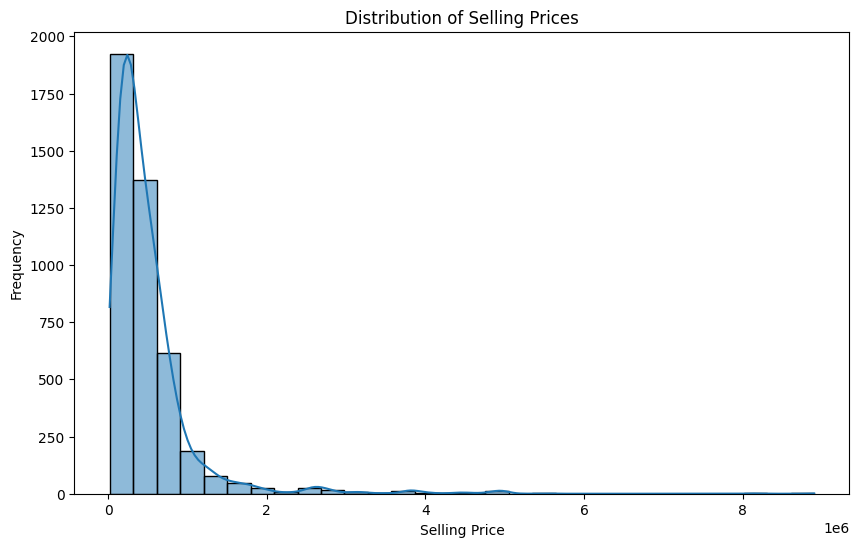

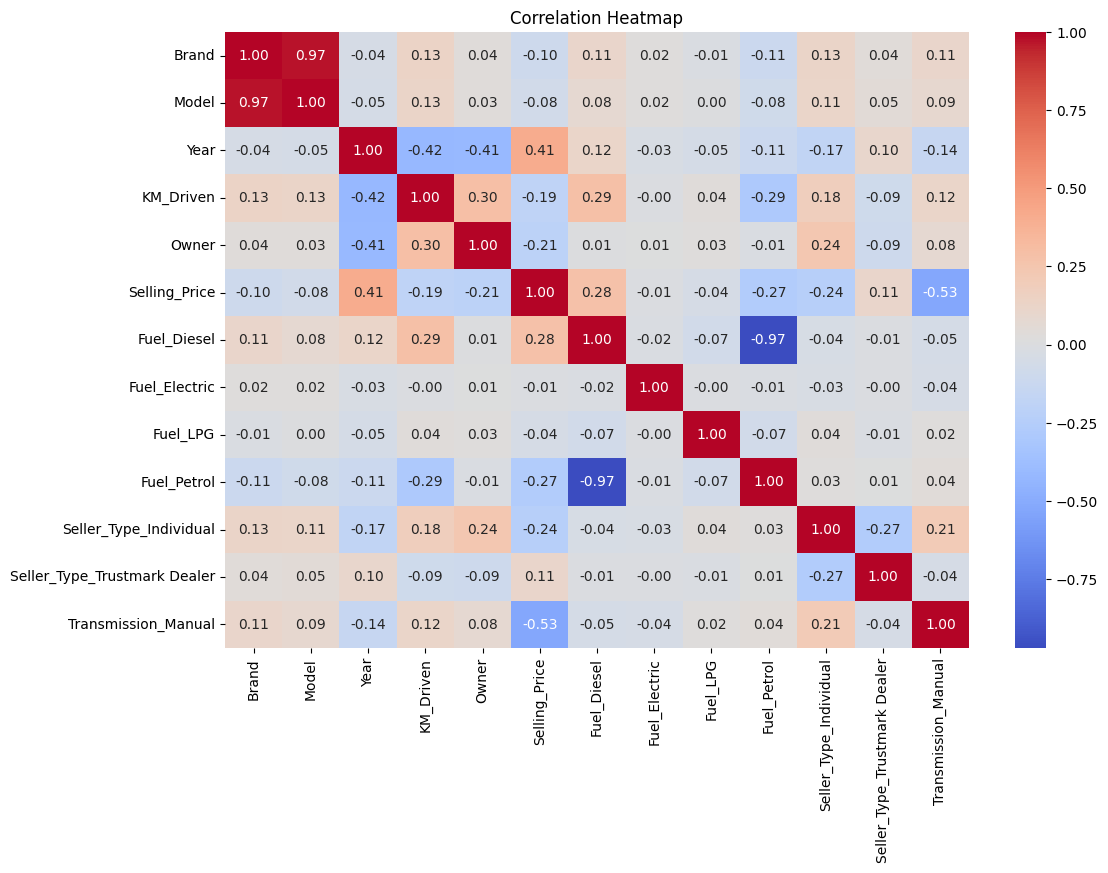

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('Car Price.csv')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize the distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Owner'] = label_encoder.fit_transform(data['Owner'])
data["Brand"] = label_encoder.fit_transform(data['Brand'])
data["Model"] = label_encoder.fit_transform(data['Model'])
data = pd.get_dummies(data, columns=['Fuel', 'Seller_Type', 'Transmission'], drop_first=True)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Bulding prediction model and assessing the accuracy 

In [ ]:
# Features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Build and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions with Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)

# Build and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

# Predictions with Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting MSE:", gb_mse)

# Summary of results
print("\nSummary of Model Performance:")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")



Training set size: (3472, 12)
Testing set size: (868, 12)
Random Forest MSE: 96562557160.89757
Gradient Boosting MSE: 104237366038.80928

Summary of Model Performance:
Random Forest MSE: 96562557160.89757
Gradient Boosting MSE: 104237366038.80928
